# **Download the dataset from Kaggle**
Before starting this project, download the jason file from kaggle

In [5]:
!pip install kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
from zipfile import ZipFile
file_name = "/content/customer-segmentation-tutorial-in-python.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


# **Importing the libraries**

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preprocessing**

In [33]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [36]:
df.shape

(200, 5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

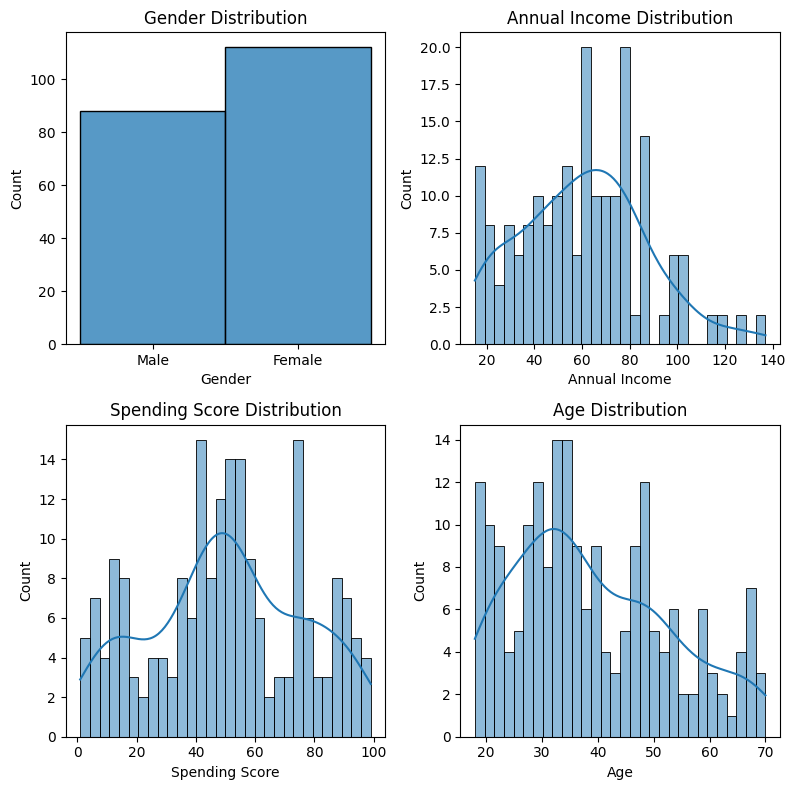

In [40]:
# Plot histograms
plt.figure(figsize=(8, 8))

# Plot Gender histogram
plt.subplot(2, 2, 1)
sns.histplot(df['Gender'], bins=2, kde=False, discrete=True)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot Annual Income histogram
plt.subplot(2, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

# Plot Spending Score histogram
plt.subplot(2, 2, 3)
sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')

# Plot Age histogram
plt.subplot(2, 2, 4)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()

In [41]:
# Encode the 'gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


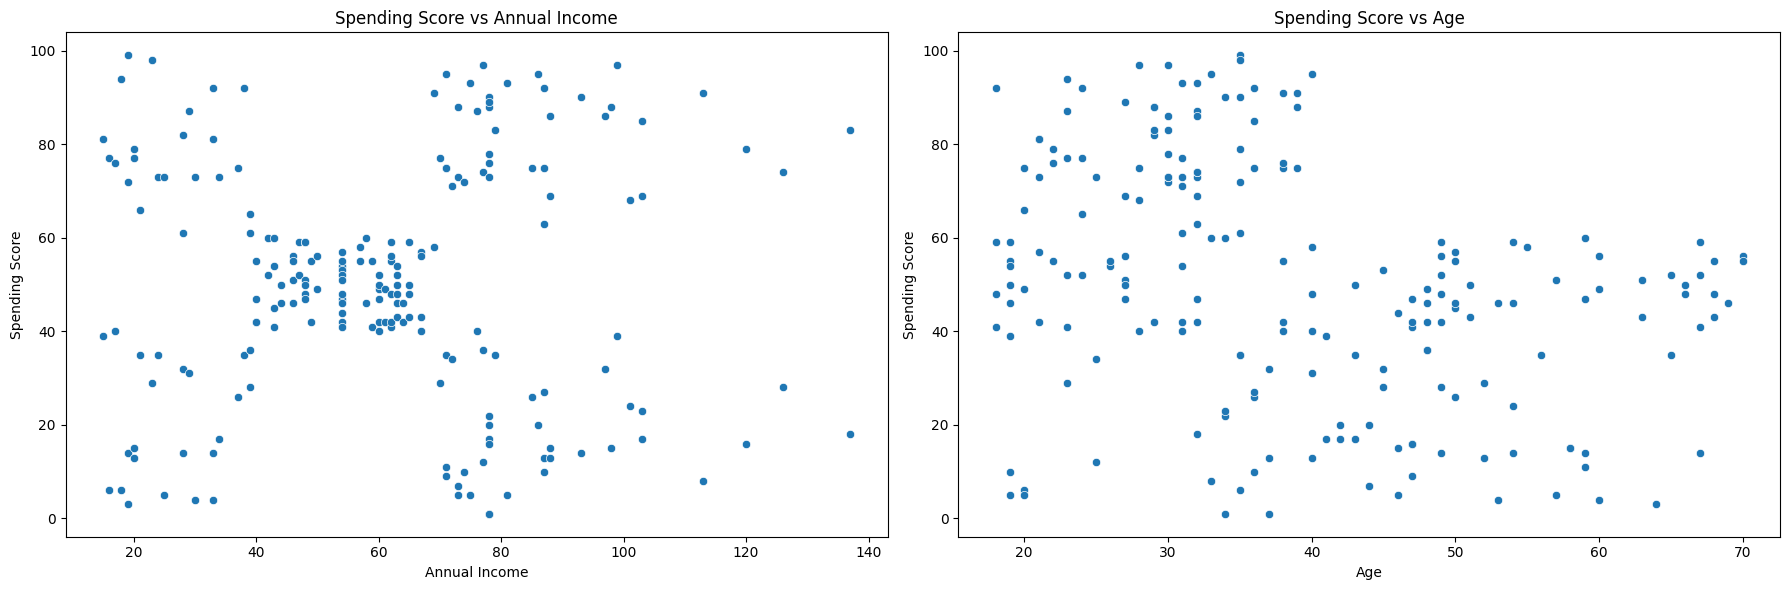

In [44]:
# Plot scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot: Spending Score vs Annual Income
plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# Scatter plot: Spending Score vs Age
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Spending Score vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score')

# Adjust the layout
plt.tight_layout()
plt.show()

In [59]:
# Select relevant features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [60]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

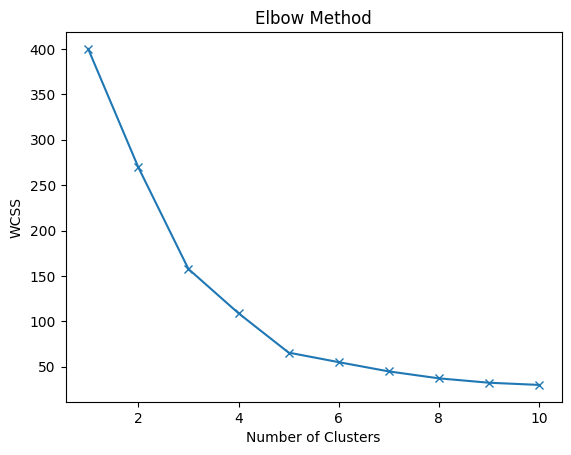

In [62]:
# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker = 'x')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [75]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [76]:
# Add the cluster labels to the original data
df['Cluster'] = clusters

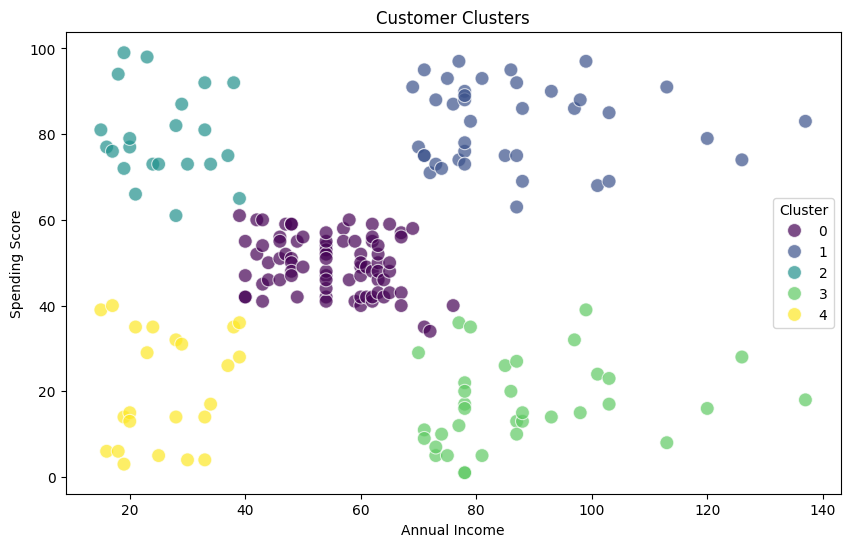

In [77]:
# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# **Silhouette Score**
Measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better-defined clusters:

In [78]:
# Evaluate the clustering performance
sil_score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.5546571631111091


The K-means clustering method effectively categorised clients into separate clusters based on their annual income and spending score. The evaluation criteria offered valuable insights into the clustering's quality. This analysis can be utilised to gain a deeper comprehension of client categories and therefore customise marketing strategies to suit their needs.